# UNSUPERVISED LEARNING



## isolation forrest; hypercontamination 
misal, kita bilang "tolong dong cari anomali, biasanya sih di 0.17%"

biasanya unsupervised akan clustering.

In [1]:
import pandas as pd
import numpy as np
import copy

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
import seaborn as sn
import matplotlib.pyplot as plt

import src.utils as utils

# Load Config File

In [2]:
CONFIG_DATA = utils.config_load()
CONFIG_DATA

{'raw_dataset_path': 'data/raw/data.csv',
 'data_set_path': 'data/output/data.pkl',
 'input_set_path': 'data/output/input.pkl',
 'output_set_path': 'data/output/output.pkl',
 'input_columns_path': 'data/output/input_columns.pkl',
 'train_set_path': ['data/output/X_train.pkl', 'data/output/y_train.pkl'],
 'valid_set_path': ['data/output/X_valid.pkl', 'data/output/y_valid.pkl'],
 'test_set_path': ['data/output/X_test.pkl', 'data/output/y_test.pkl'],
 'output_column': 'Class',
 'seed': 42,
 'test_size': 0.2,
 'standardizer_path': 'data/output/standardizer.pkl',
 'preprocessor_path': 'data/output/preprocessor.pkl',
 'train_clean_path': ['data/output/X_train_clean.pkl',
  'data/output/y_train_clean.pkl'],
 'valid_clean_path': ['data/output/X_valid_clean.pkl',
  'data/output/y_valid_clean.pkl'],
 'test_clean_path': ['data/output/X_test_clean.pkl',
  'data/output/y_test_clean.pkl'],
 'list_of_model_path': 'log/list_of_model.pkl',
 'list_of_param_path': 'log/list_of_param.pkl',
 'list_of_tuned

# Create Model

Model of Choice
- Isolation Forest
- LOF (Local Outlier Factor)

## Isolation Forest

We are going to use all the data points available (the clean one)

In [3]:
X_train = utils.pickle_load(CONFIG_DATA['train_clean_path'][0])
X_valid = utils.pickle_load(CONFIG_DATA['valid_clean_path'][0])
X_test = utils.pickle_load(CONFIG_DATA['test_clean_path'][0])

y_train = utils.pickle_load(CONFIG_DATA['train_clean_path'][1])
y_valid = utils.pickle_load(CONFIG_DATA['valid_clean_path'][1])
y_test = utils.pickle_load(CONFIG_DATA['test_clean_path'][1])

In [4]:
features = pd.concat([X_train, X_valid, X_test]).reset_index(drop=True)
labels = pd.concat([y_train, y_valid, y_test]).reset_index(drop=True)

In [5]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.881629,1.917132,-0.270116,-0.724570,1.232514,0.176868,0.671585,-0.324136,0.183471,0.945501,...,-0.191685,-0.521906,-1.260449,0.275253,-1.233377,-0.216956,-1.055328,0.050492,-0.047530,0.105637
1,-0.776352,-2.464211,1.191720,-1.662436,0.324835,1.644393,3.377992,-0.762286,1.924346,0.427701,...,-0.307218,-0.113684,-0.029322,0.345004,0.957777,0.238767,-0.257482,0.055758,-0.065821,0.724549
2,-0.076882,1.144868,-0.233643,0.326144,-0.090142,-0.343074,0.139178,-0.403327,0.299978,0.200683,...,-0.219942,-0.000669,-0.044102,0.097355,-0.260501,0.019398,0.994229,-0.063142,-0.014753,-0.168513
3,-0.355373,-2.474770,1.864723,0.394075,1.512943,-1.356818,1.141271,-1.390996,2.106331,0.337888,...,-0.252878,-0.281465,-0.716155,0.047440,-0.773121,0.179948,-0.326727,-0.171670,-0.088989,-0.029961
4,1.020123,2.143241,-0.935954,-0.611902,-0.879246,-0.861117,-0.386023,-0.929392,-0.138473,-0.065163,...,0.115463,0.338995,1.052014,0.134982,0.805107,-0.088917,-0.127099,0.010406,-0.035502,0.112670


In [6]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:

to_model_cols = features.columns[0:30]
clf = IsolationForest(n_estimators=10, 
                      max_samples='auto', 
                      contamination=float(0.1789/100), # number of anomaly in our data
                      max_features=1.0, 
                      bootstrap=False, 
                      n_jobs=-1, 
                      random_state=12345, 
                      verbose=0)
clf.fit(features[to_model_cols])

pred = clf.predict(features[to_model_cols])
features['Class'] = pred
outliers = features.loc[features['Class']==-1]
outlier_index=list(outliers.index)
#Find the number of anomalies and normal points (points classified as "-1" are anomalous)
print(features['Class'].value_counts())

Class
 1    103007
-1       184
Name: count, dtype: int64


In [ ]:
features['Class'] = features['Class'].map({1 : 0 , -1: 1})

'''
mapping ke 0 for legitimate, and 1 for fraudulent transcations
'''

<Axes: >

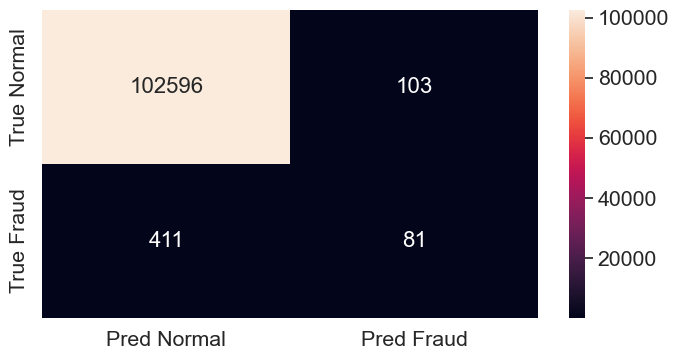

In [14]:
if_cm=confusion_matrix(labels, features['Class'])
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Key Insights:
1. kemungkinan akan ada 493 fraudulent transactions yg fraud dari 100.000 transactions
2. tapi kedetect cuma 81. on the other side; kemungkinan akan ada False Negative 411. 
3. Performance model kurang OK dong kalau begitu, 411 lolos

Key Metrics that should be the main concern is Precision. Since it measures TP given the total Positive Outcome (true and negative Fraudulent Transactions)


### Local Outlier Factor

In [10]:
from sklearn.neighbors import LocalOutlierFactor

clf_lof = LocalOutlierFactor(n_neighbors=30, 
                             algorithm='auto', 
                             contamination=.002)

# data_50k_new = standardized_data_without_class[0:50000]
# data_50k_df = pd.DataFrame(data=data_50k_new)

y_pred = clf_lof.fit_predict(features)

LOF_Scores = clf_lof.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])

<Axes: >

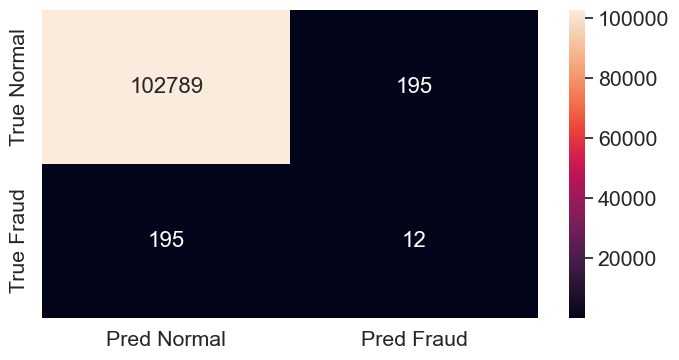

In [11]:
lof_cm=confusion_matrix(LOF_pred, features['Class'])
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size